#📌 Extracción

El enlace directo (raw) al archivo JSON es:
`https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json`

In [1]:
!pip install requests


In [2]:
import requests
import pandas as pd
import json

In [3]:
# URL del archivo JSON raw
json_url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'

datos = requests.get(json_url)


In [4]:
resultado = json.loads(datos.text)


In [5]:
df = pd.DataFrame(resultado)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [7]:
df_normalizado = pd.json_normalize(resultado)
df_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

#🔧 Transformación

Vemos los valores missing y filas duplicadas a traves de `isnull().sum()` y `duplicated().sum()`


In [9]:
print('--- Verificación de valores ausentes en df_normalizado ---')
print(df_normalizado.isnull().sum())

print('\n--- Verificación de filas duplicadas en df_normalizado ---')
print(f'Número de filas duplicadas: {df_normalizado.duplicated().sum()}')

--- Verificación de valores ausentes en df_normalizado ---
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

--- Verificación de filas duplicadas en df_normalizado ---
Número de filas duplicadas: 0


Verificamos los tipos de datos de `df_normalizado` usando el metodo `.info()` para ver que tipo de columnas hay.  



In [10]:
#Verificacion de tipos de datos
print('--- Información de los tipos de datos de df_normalizado ---')
df_normalizado.info()

--- Información de los tipos de datos de df_normalizado ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   o

Como observamos, se identifica que la columna `account.Charges.Total` es del tipo objeto, se pasa a transformar la misma para que sea del tipo float.

Se reemplazamos valores vacios con NaN, convertimos la columna a numerica tipo float, y luego llenamos los valores NaN por ceros (0.0).



In [11]:
print('--- Identificando y corrigiendo el tipo de dato de account.Charges.Total ---')

# Identificar valores no numéricos (como cadenas vacías) que impiden la conversión directa
# Convertir a numérico, forzando errores a NaN
df_normalizado['account.Charges.Total'] = pd.to_numeric(df_normalizado['account.Charges.Total'], errors='coerce')

# Verificar cuántos NaN se introdujeron (estos son los valores no numéricos originales, incluyendo '')
nans_iniciales = df_normalizado['account.Charges.Total'].isnull().sum()
print(f'Número de valores no numéricos (incluyendo cadenas vacías) encontrados y convertidos a NaN: {nans_iniciales}')

# Llenar los valores NaN (que originalmente eran cadenas vacías) con 0.0
df_normalizado['account.Charges.Total'] = df_normalizado['account.Charges.Total'].fillna(0.0)

# Re-verificar el tipo de dato para confirmar la conversión
print('\n--- Tipo de dato de account.Charges.Total después de la corrección ---')
print(df_normalizado['account.Charges.Total'].dtype)

# Mostrar algunas filas donde los valores fueron modificados (para verificación)
# Solo si hay valores modificados
if nans_iniciales > 0:
    print('\n--- Primeras filas con account.Charges.Total = 0.0 después de la corrección ---')
    print(df_normalizado[df_normalizado['account.Charges.Total'] == 0.0].head())


--- Identificando y corrigiendo el tipo de dato de account.Charges.Total ---
Número de valores no numéricos (incluyendo cadenas vacías) encontrados y convertidos a NaN: 11

--- Tipo de dato de account.Charges.Total después de la corrección ---
float64

--- Primeras filas con account.Charges.Total = 0.0 después de la corrección ---
      customerID Churn customer.gender  customer.SeniorCitizen  \
975   1371-DWPAZ    No          Female                       0   
1775  2520-SGTTA    No          Female                       0   
1955  2775-SEFEE    No            Male                       0   
2075  2923-ARZLG    No            Male                       0   
2232  3115-CZMZD    No            Male                       0   

     customer.Partner customer.Dependents  customer.tenure phone.PhoneService  \
975               Yes                 Yes                0                 No   
1775              Yes                 Yes                0                Yes   
1955               No      

**Analizamos inconsistencias en columnas categóricas**

Iteramos a traves de las columnas tipo objeto (excluyendo 'customerID') en `df_normalizado` y mostramos los valores unicos para ver si hay inconsistencias.


In [12]:
print('--- Análisis de valores únicos en columnas categóricas de df_normalizado ---')

# Identificar columnas de tipo 'object'
columnas_objeto = df_normalizado.select_dtypes(include='object').columns

# Excluir 'customerID' de la lista de columnas a revisar
columnas_a_chequear = [col for col in columnas_objeto if col != 'customerID']

# Iterar y mostrar valores únicos para cada columna
for col in columnas_a_chequear:
    print(f'\nColumna "{col}": {df_normalizado[col].unique()}')

--- Análisis de valores únicos en columnas categóricas de df_normalizado ---

Columna "Churn": ['No' 'Yes' '']

Columna "customer.gender": ['Female' 'Male']

Columna "customer.Partner": ['Yes' 'No']

Columna "customer.Dependents": ['Yes' 'No']

Columna "phone.PhoneService": ['Yes' 'No']

Columna "phone.MultipleLines": ['No' 'Yes' 'No phone service']

Columna "internet.InternetService": ['DSL' 'Fiber optic' 'No']

Columna "internet.OnlineSecurity": ['No' 'Yes' 'No internet service']

Columna "internet.OnlineBackup": ['Yes' 'No' 'No internet service']

Columna "internet.DeviceProtection": ['No' 'Yes' 'No internet service']

Columna "internet.TechSupport": ['Yes' 'No' 'No internet service']

Columna "internet.StreamingTV": ['Yes' 'No' 'No internet service']

Columna "internet.StreamingMovies": ['No' 'Yes' 'No internet service']

Columna "account.Contract": ['One year' 'Month-to-month' 'Two year']

Columna "account.PaperlessBilling": ['Yes' 'No']

Columna "account.PaymentMethod": ['Mailed 

**Reemplazo de valores vacíos en la columna 'Churn'**

Procedemos a reemplazar cualquier valor vacío (cadena vacía) en la columna `Churn` con la etiqueta 'No'.

In [13]:
print('--- Reemplazando valores vacíos en \'Churn\' por \'No\' ---')

# Reemplazar cadenas vacías por 'No' en la columna 'Churn'
df_normalizado['Churn'] = df_normalizado['Churn'].replace({'': 'No'})

print(f'Nuevos valores únicos en la columna \'Churn\': {df_normalizado['Churn'].unique()}')

--- Reemplazando valores vacíos en 'Churn' por 'No' ---
Nuevos valores únicos en la columna 'Churn': ['No' 'Yes']


Verificamos la columna 'customer.SeniorCitizen'que es categorica pero del tipo int para ver si tenemos inconsistencias

In [14]:
df_normalizado['customer.SeniorCitizen'].unique()
print(f'Columna "customer.SeniorCitizen": {df_normalizado['customer.SeniorCitizen'].unique()}')

Columna "customer.SeniorCitizen": [0 1]


**Generamos estadísticas descriptivas para columnas numéricas**

Generamos estadisticas descriptivas (count, mean, standard deviation, minimum, quartiles, maximum) para las columnas numericas `customer.tenure`, `account.Charges.Monthly`, y la correcta `account.Charges.Total` en `df_normalizado` DataFrame, con el metodo `.describe()`.

In [15]:
print('--- Estadísticas descriptivas para columnas numéricas seleccionadas en df_normalizado ---')
columnas_numericas_seleccionadas = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']
print(df_normalizado[columnas_numericas_seleccionadas].describe())

--- Estadísticas descriptivas para columnas numéricas seleccionadas en df_normalizado ---
       customer.tenure  account.Charges.Monthly  account.Charges.Total
count      7267.000000              7267.000000            7267.000000
mean         32.346498                64.720098            2277.182035
std          24.571773                30.129572            2268.648587
min           0.000000                18.250000               0.000000
25%           9.000000                35.425000             396.200000
50%          29.000000                70.300000            1389.200000
75%          55.000000                89.875000            3778.525000
max          72.000000               118.750000            8684.800000


**Limpieza finalizada, DataFrame `df_normalizado` listo para continuar análisis.**

In [16]:
print('--- Creando la columna Cuentas_Diarias ---')
df_normalizado['Cuentas_Diarias'] = df_normalizado['account.Charges.Monthly'] / 30
print(df_normalizado[['account.Charges.Monthly', 'Cuentas_Diarias']].head())

--- Creando la columna Cuentas_Diarias ---
   account.Charges.Monthly  Cuentas_Diarias
0                     65.6         2.186667
1                     59.9         1.996667
2                     73.9         2.463333
3                     98.0         3.266667
4                     83.9         2.796667


**Transformacion colimnas binarias**
transformamos las columnas de texto binarias, a numericas binarias, "Yes"=1 , "No"=0

In [17]:
columnas_a_binarias = [
    'Churn',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'account.PaperlessBilling',
]
for col in columnas_a_binarias:
    print(f'\nColumna "{col}": {df_normalizado[col].unique()}')

mapping_binary = {'Yes': 1, 'No': 0}
for col in columnas_a_binarias:
  df_normalizado[col] = df_normalizado[col].replace(mapping_binary)
  print(f"\nColumna '{col}' convertida. Nuevos valores únicos: {df_normalizado[col].unique()}")

print('\n--- Verificación de los tipos de datos después de la conversión ---')
df_normalizado.info()

print('\n--- Primeras 5 filas del DataFrame después de la conversión binaria ---')
display(df_normalizado.head())


Columna "Churn": ['No' 'Yes']

Columna "customer.Partner": ['Yes' 'No']

Columna "customer.Dependents": ['Yes' 'No']

Columna "phone.PhoneService": ['Yes' 'No']

Columna "account.PaperlessBilling": ['Yes' 'No']

Columna 'Churn' convertida. Nuevos valores únicos: [0 1]

Columna 'customer.Partner' convertida. Nuevos valores únicos: [1 0]

Columna 'customer.Dependents' convertida. Nuevos valores únicos: [1 0]

Columna 'phone.PhoneService' convertida. Nuevos valores únicos: [1 0]

Columna 'account.PaperlessBilling' convertida. Nuevos valores únicos: [1 0]

--- Verificación de los tipos de datos después de la conversión ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   int64  
 2   customer.gender            7267 non-

/tmp/ipython-input-4010966773.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalizado[col] = df_normalizado[col].replace(mapping_binary)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


#📊 Carga y análisis

Analisis Descriptivo

In [18]:
df_normalizado.describe()

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2277.182035,2.157337
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,396.200000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1389.200000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


Con count tenemos el número total de entradas no nulas en la columna. Como es igual al número total de filas, significa que no hay valores faltantes.

In [19]:
print('--- Estadísticas descriptivas para columnas de tipo objeto en df_normalizado ---')
df_normalizado.describe(include='object')

--- Estadísticas descriptivas para columnas de tipo objeto en df_normalizado ---


,customerID,customer.gender,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaymentMethod
count,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,7267,2,3,3,3,3,3,3,3,3,3,4
top,9995-HOTOH,Male,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check
freq,1,3675,3495,3198,3608,3182,3195,3582,2896,2870,4005,2445


In [20]:
print('--- Porcentajes de frecuencia para columnas categóricas de df_normalizado ---')

# Identificar columnas de tipo 'object'
columnas_objeto = df_normalizado.select_dtypes(include='object').columns

# Excluir 'customerID' de la lista de columnas a revisar, ya que todos son únicos y no es categórica en este sentido
columnas_a_analizar = [col for col in columnas_objeto if col != 'customerID']

# Iterar y mostrar porcentajes de frecuencia para cada columna
for col in columnas_a_analizar:
    print(f'\n--- Columna: {col} ---')
    # value_counts() con normalize=True devuelve las proporciones
    # Multiplicar por 100 para obtener porcentajes
    porcentajes = df_normalizado[col].value_counts(normalize=True) * 100
    print(porcentajes.round(2).astype(str) + '%')

--- Porcentajes de frecuencia para columnas categóricas de df_normalizado ---

--- Columna: customer.gender ---
customer.gender
Male      50.57%
Female    49.43%
Name: proportion, dtype: object

--- Columna: phone.MultipleLines ---
phone.MultipleLines
No                  48.09%
Yes                 42.18%
No phone service     9.73%
Name: proportion, dtype: object

--- Columna: internet.InternetService ---
internet.InternetService
Fiber optic    44.01%
DSL            34.24%
No             21.76%
Name: proportion, dtype: object

--- Columna: internet.OnlineSecurity ---
internet.OnlineSecurity
No                     49.65%
Yes                     28.6%
No internet service    21.76%
Name: proportion, dtype: object

--- Columna: internet.OnlineBackup ---
internet.OnlineBackup
No                     43.79%
Yes                    34.46%
No internet service    21.76%
Name: proportion, dtype: object

--- Columna: internet.DeviceProtection ---
internet.DeviceProtection
No                     43.9

**Distribución de evasión**

--- Distribución de la variable Churn ---
Churn
No Churn    74.28%
Churn       25.72%
Name: count, dtype: object


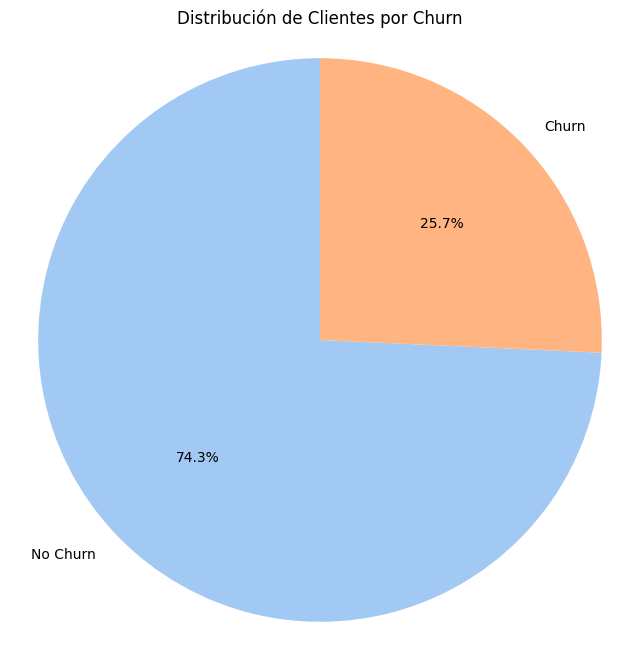

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener los conteos de cada categoría en 'Churn'
churn_conteo = df_normalizado['Churn'].value_counts()

# Renombrar los índices para que sean más descriptivos (0: No Churn, 1: Churn)
churn_labels = {0: 'No Churn', 1: 'Churn'}
churn_conteo = churn_conteo.rename(index=churn_labels)

# Calcular porcentajes
churn_porcentaje = churn_conteo / churn_conteo.sum() * 100

print('--- Distribución de la variable Churn ---')
print(churn_porcentaje.round(2).astype(str) + '%')

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(churn_conteo, labels=churn_conteo.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribución de Clientes por Churn')
plt.axis('equal') # Asegura que el gráfico de pastel sea circular.
plt.show()

Aproximadamente una cuarta parte de los clientes ha optado por darse de baja, lo que indica que la fuga de clientes es un factor significativo para esta empresa de telecomunicaciones y es un área clave para investigar y mejorar.



**Recuento de evasión por variables categóricas**

Analizamos la evasión por variables categoricas calculando el ratio de churn para cada categoria y luego visualizamos en gráficos y asi luego identificar los segmentos de mayor o menor tendencia de churn, a fin de resumir los patrones observador para definir estrategias.

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

print('--- Análisis de la tasa de Churn por variables categóricas ---')

# Definir la lista de columnas categóricas para el análisis
# Incluye columnas 'object' y las columnas binarias ya convertidas a int64
categorical_cols = [
    'customer.gender',
    'customer.SeniorCitizen',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.InternetService',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.Contract',
    'account.PaperlessBilling',
    'account.PaymentMethod'
]

# Iterar sobre cada columna categórica y calcular la tasa de churn
for col in categorical_cols:
    print(f'\n--- Tasa de Churn para: {col} ---')
    churn_rate = df_normalizado.groupby(col)['Churn'].mean().sort_values(ascending=False)
    # Multiplicar por 100 para obtener porcentajes y redondear a 2 decimales
    print((churn_rate * 100).round(2).astype(str) + '%')


--- Análisis de la tasa de Churn por variables categóricas ---

--- Tasa de Churn para: customer.gender ---
customer.gender
Female    26.14%
Male      25.31%
Name: Churn, dtype: object

--- Tasa de Churn para: customer.SeniorCitizen ---
customer.SeniorCitizen
1    40.27%
0    22.89%
Name: Churn, dtype: object

--- Tasa de Churn para: customer.Partner ---
customer.Partner
0    32.01%
1    19.02%
Name: Churn, dtype: object

--- Tasa de Churn para: customer.Dependents ---
customer.Dependents
0    30.34%
1    14.95%
Name: Churn, dtype: object

--- Tasa de Churn para: phone.PhoneService ---
phone.PhoneService
1     25.9%
0    24.05%
Name: Churn, dtype: object

--- Tasa de Churn para: phone.MultipleLines ---
phone.MultipleLines
Yes                 27.73%
No                  24.29%
No phone service    24.05%
Name: Churn, dtype: object

--- Tasa de Churn para: internet.InternetService ---
internet.InternetService
Fiber optic    40.56%
DSL            18.45%
No              7.15%
Name: Churn, dt

Se ha calculado los ratios de churn, ahora proceso a visualizar para identificar mas de inmediato los resultados. Se procede a hacer plots para cada categoria mostrando el ratio de churn de cada una.

--- Visualización de la tasa de Churn por variables categóricas ---


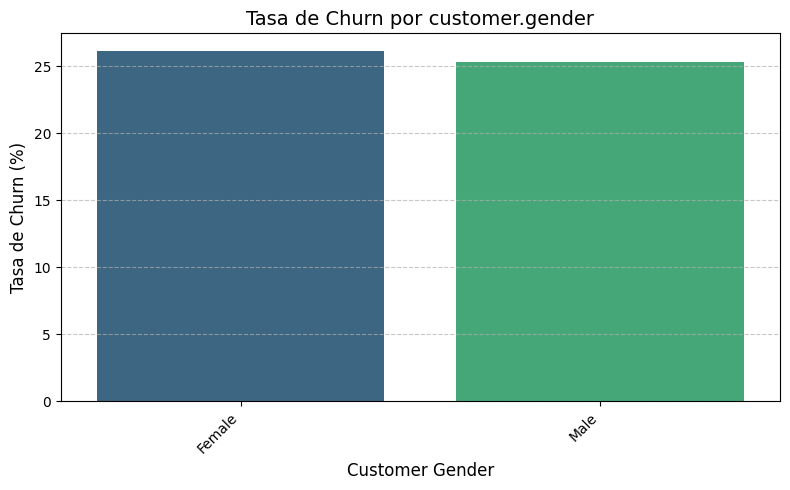

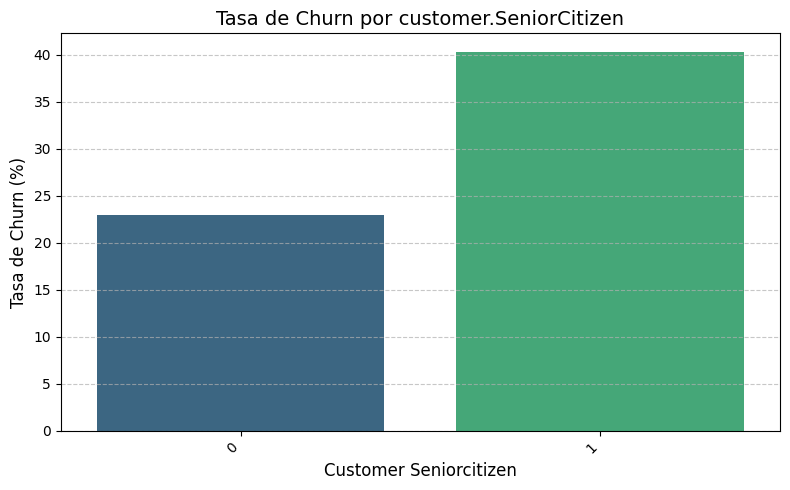

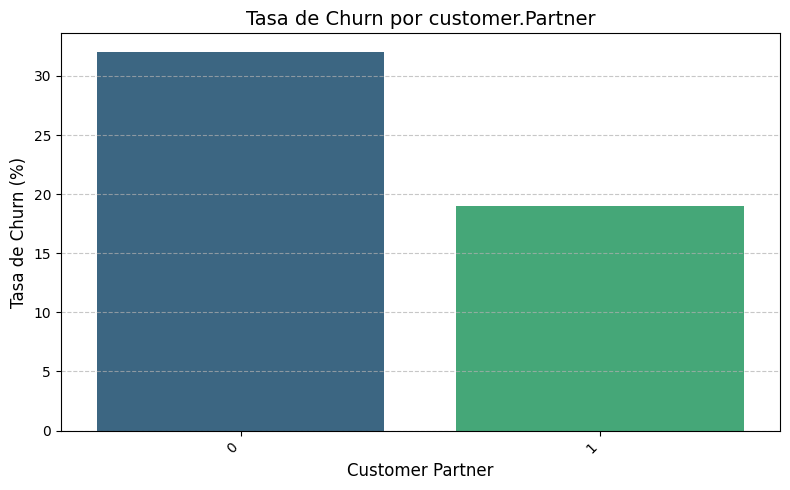

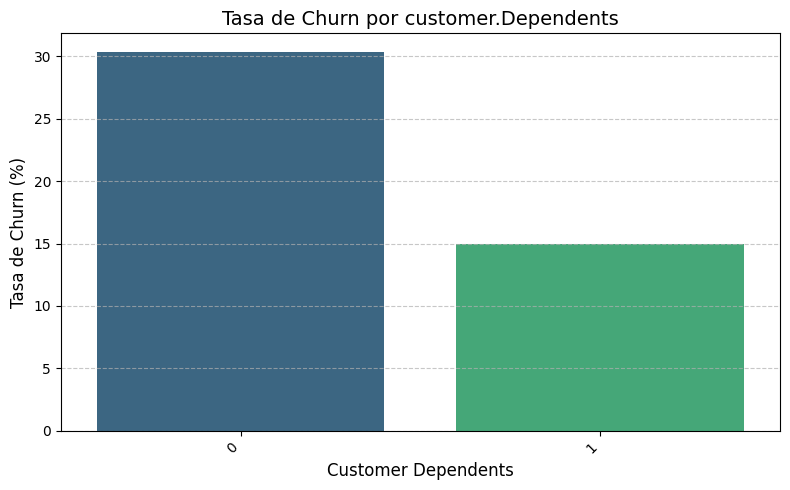

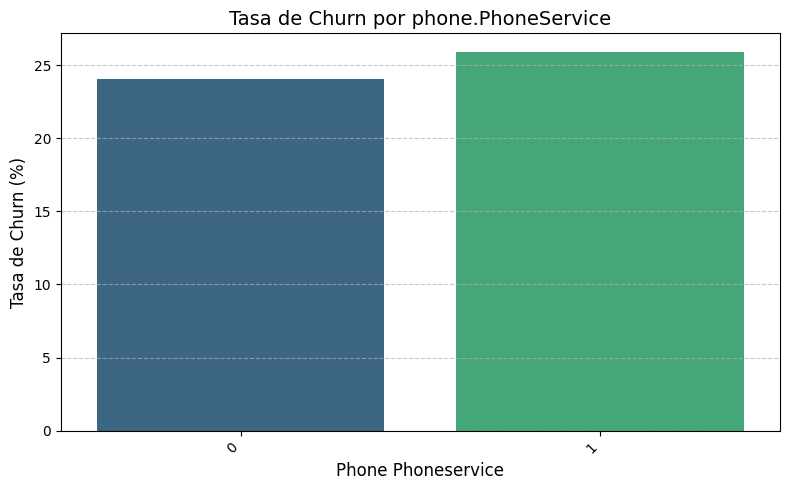

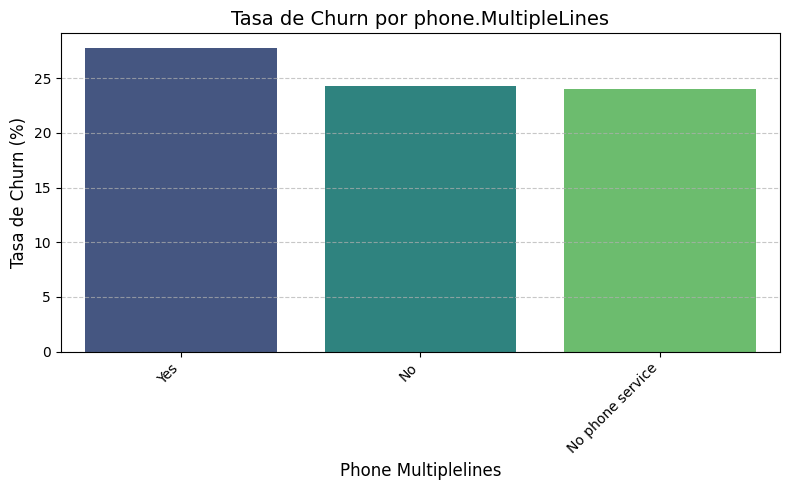

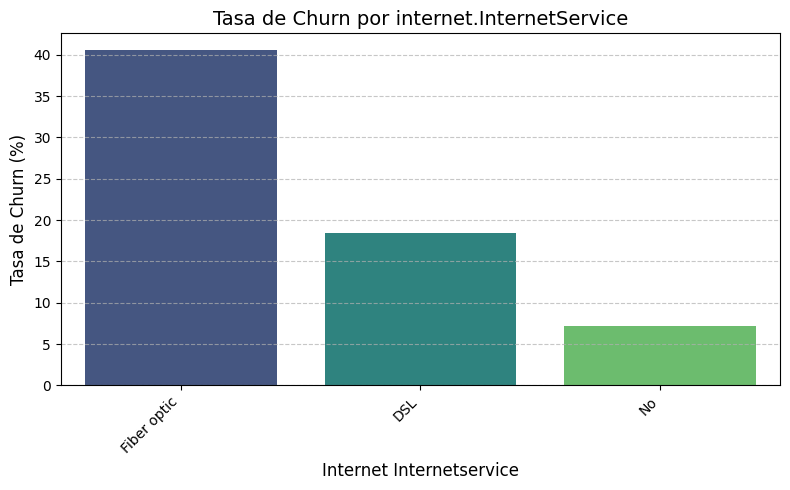

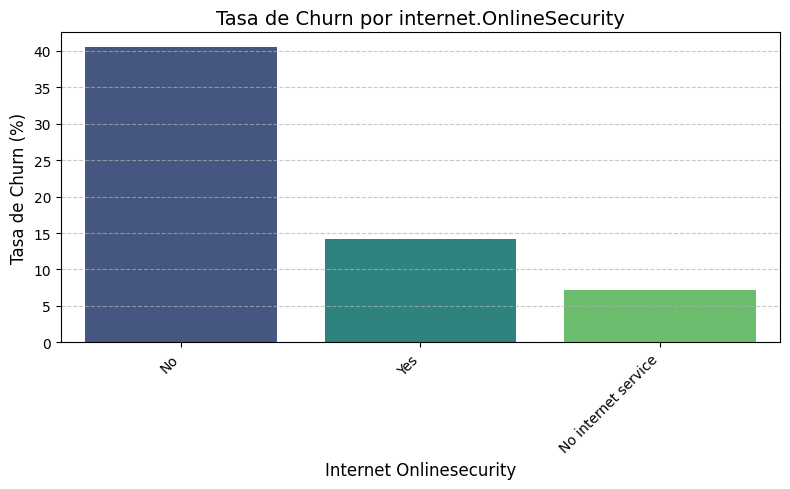

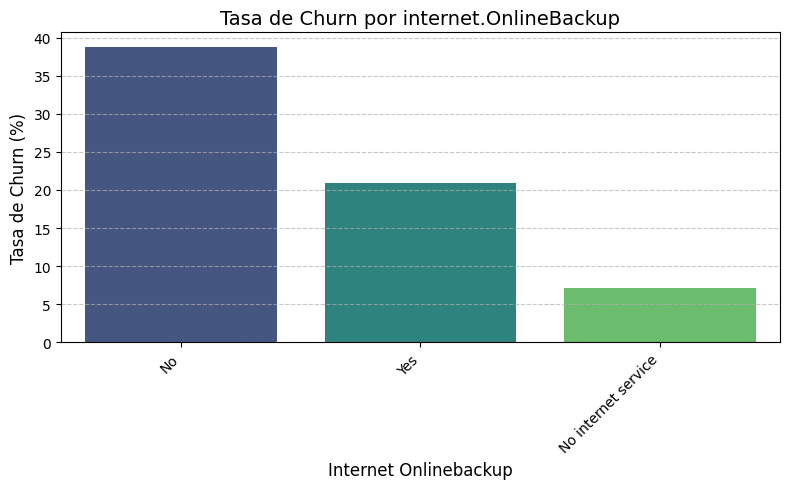

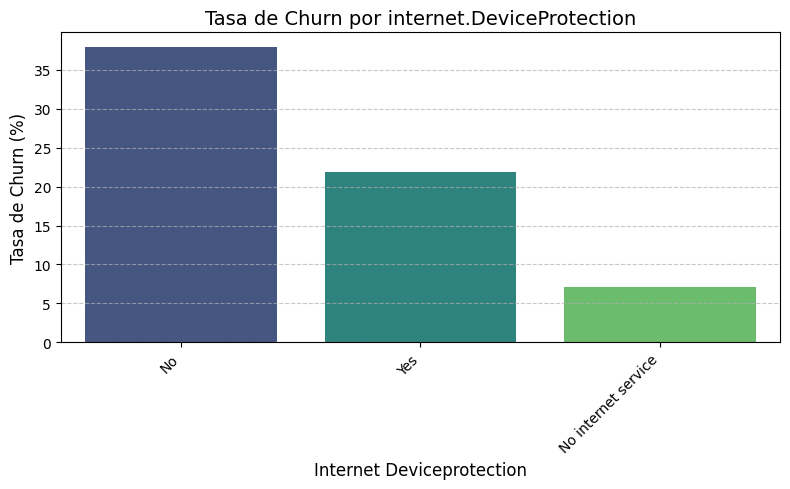

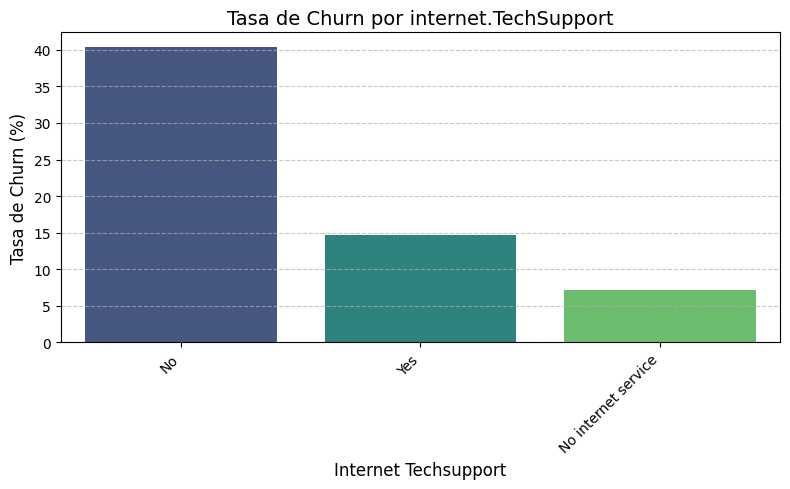

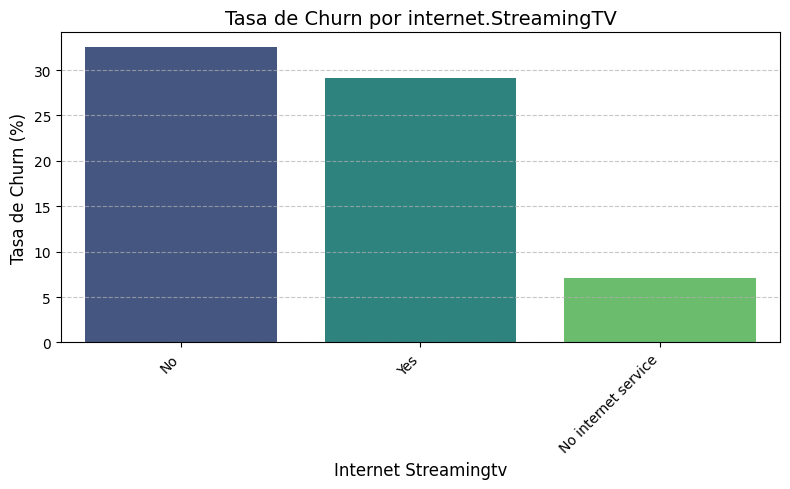

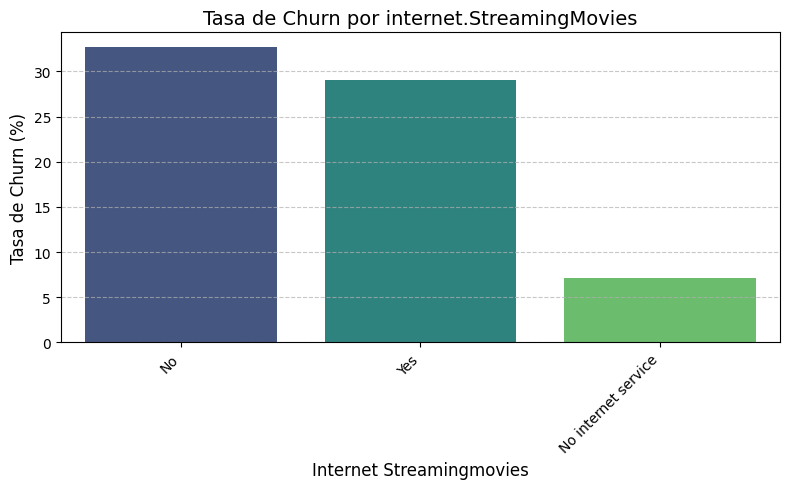

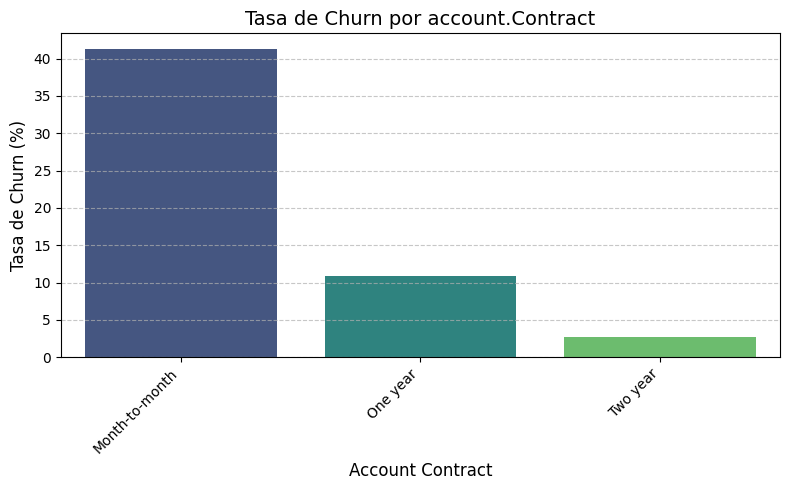

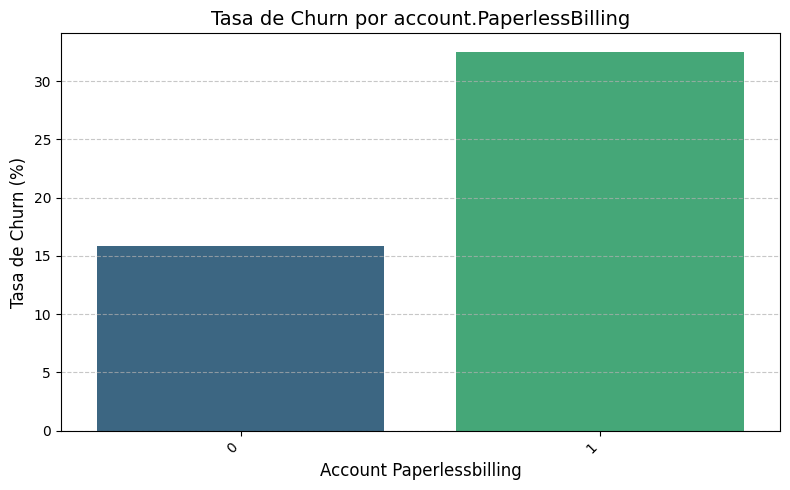

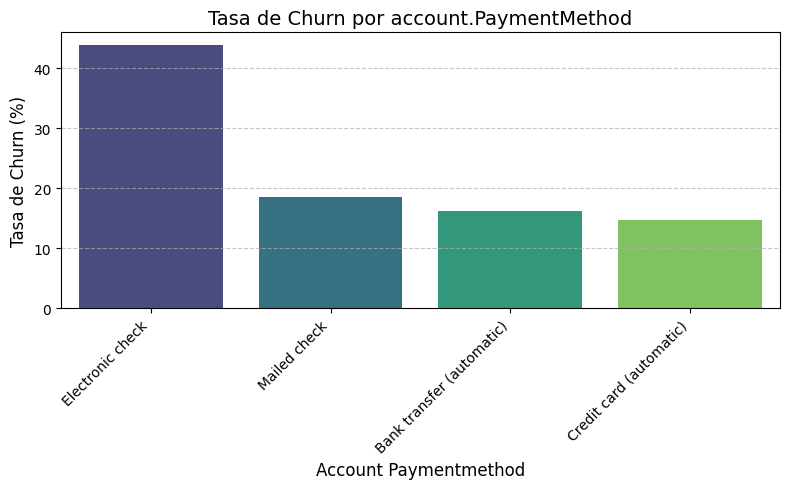

--- Resumen de los principales patrones de Churn observados ---
1. Los clientes SeniorCitizens (40.27%) tienen una tasa de churn significativamente más alta que los no SeniorCitizens (22.89%).
2. Los clientes sin pareja (Partners=0) y sin dependientes (Dependents=0) muestran tasas de churn más altas (32.01% y 30.34% respectivamente).
3. El servicio de internet de Fibra Óptica tiene la tasa de churn más alta (40.56%) en comparación con DSL (18.45%) y la ausencia de servicio de internet (7.15%). Esto sugiere problemas con la calidad o el costo del servicio de fibra óptica.
4. La falta de servicios de seguridad en línea (OnlineSecurity=No), copia de seguridad (OnlineBackup=No), protección de dispositivos (DeviceProtection=No) y soporte técnico (TechSupport=No) está asociada con tasas de churn considerablemente más altas (alrededor del 38-40%).
5. Los contratos mes a mes (Month-to-month) tienen una tasa de churn drásticamente mayor (41.32%) que los contratos a un año (10.93%) o dos años (2

In [23]:
print('--- Visualización de la tasa de Churn por variables categóricas ---')

# Definir la lista de columnas categóricas para el análisis
categorical_cols = [
    'customer.gender',
    'customer.SeniorCitizen',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.InternetService',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.Contract',
    'account.PaperlessBilling',
    'account.PaymentMethod'
]

# Iterar sobre cada columna categórica y crear un gráfico de barras de la tasa de churn
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    churn_rate = df_normalizado.groupby(col)['Churn'].mean().sort_values(ascending=False)
    sns.barplot(x=churn_rate.index, y=churn_rate.values * 100, hue=churn_rate.index, palette='viridis', legend=False)
    plt.title(f'Tasa de Churn por {col}', fontsize=14)
    plt.xlabel(col.replace('.', ' ').title(), fontsize=12)
    plt.ylabel('Tasa de Churn (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

print('--- Resumen de los principales patrones de Churn observados ---')
print('1. Los clientes SeniorCitizens (40.27%) tienen una tasa de churn significativamente más alta que los no SeniorCitizens (22.89%).')
print('2. Los clientes sin pareja (Partners=0) y sin dependientes (Dependents=0) muestran tasas de churn más altas (32.01% y 30.34% respectivamente).')
print('3. El servicio de internet de Fibra Óptica tiene la tasa de churn más alta (40.56%) en comparación con DSL (18.45%) y la ausencia de servicio de internet (7.15%). Esto sugiere problemas con la calidad o el costo del servicio de fibra óptica.')
print('4. La falta de servicios de seguridad en línea (OnlineSecurity=No), copia de seguridad (OnlineBackup=No), protección de dispositivos (DeviceProtection=No) y soporte técnico (TechSupport=No) está asociada con tasas de churn considerablemente más altas (alrededor del 38-40%).')
print('5. Los contratos mes a mes (Month-to-month) tienen una tasa de churn drásticamente mayor (41.32%) que los contratos a un año (10.93%) o dos años (2.75%), lo que indica que los contratos a largo plazo fomentan la retención.')
print('6. Los clientes con facturación electrónica (PaperlessBilling=1) tienen una tasa de churn más alta (32.48%) que aquellos con facturación en papel (15.87%).')
print('7. El método de pago "Cheque Electrónico" (Electronic check) presenta la tasa de churn más elevada (43.8%), lo que podría indicar insatisfacción con el proceso de pago o problemas asociados a este método.')
print('Estas observaciones resaltan áreas clave donde la empresa puede enfocar esfuerzos de retención, como mejorar los servicios de soporte y seguridad, ofrecer incentivos para contratos a largo plazo, y optimizar la experiencia del cliente con la facturación electrónica y el servicio de fibra óptica.')


Con esto vemos la distribucion de Churn segun las categorias y asi vemos sus tendencias para elaborar acciones estrategicas.

**Resumen**
El análisis proporcionó un informe completo sobre la distribución de la rotación de clientes en diversas variables categóricas, identificando segmentos específicos de clientes con mayor o menor tendencia de churn y analizando las implicaciones para las acciones estratégicas. El proceso implicó calcular y visualizar las tasas de churn para 16 características categóricas y resumir los patrones clave observados.

Hallazgos clave del análisis de datos
* **Senior Citizens:** Las personas mayores de 18 años presentan una tasa de churn significativamente mayor, del 40,27 %, en comparación con las personas sin edad avanzada (22,89 %).
* **Without a partner:** Los clientes sin pareja (32,01 %) y sin dependientes (30,34 %) presentan tasas de churn elevadas.
* **Fiber Optic Internet Service:** El servicio de internet por fibra óptica (40,56 %) presenta la tasa de churn más alta, con un 40,56 %, sustancialmente superior al DSL (18,45 %) y a quienes no tienen servicio de internet (7,15 %).
* La falta de servicios clave de seguridad en internet, como **Online Security (38-40%), Online Backup (38-40%), Device Protection (38-40%) y Tech Support (38-40%)**, se asocia con tasas de abandono considerablemente más altas.
* Los **Month-to-month contracts** tienen una tasa de abandono significativamente mayor, del 41,32%, en comparación con los contratos de uno (10,93%) y dos (2,75%).
* Los clientes con **Paperless Billing**  muestran una tasa de abandono más alta, del 32,48%, en comparación con aquellos con facturación en papel (15,87%).
* El **Electronic Check payment method** se asocia con la tasa de abandono más alta, del 43,8%.


**Perspectivas o próximos pasos**
* Centrar los esfuerzos de retención en mejorar los servicios y el soporte para los usuarios de internet de fibra óptica y aquellos que carecen de funciones de seguridad en línea.
* Desarrollar programas de incentivos para animar a los clientes a cambiar de contratos mensuales a acuerdos a largo plazo y así mejorar la retención.
* Investigar la experiencia del usuario y los posibles problemas asociados con la facturación electrónica y el método de pago con cheque electrónico para mitigar la alta tasa de abandono en estos segmentos de clientes.

**Conteo de evasión por variables numéricas**
Para las columnas numéricas (customer.tenure, account.Charges.Monthly, account.Charges.Total), hacemos las estadisticas descripticas para la categoria churn.

In [24]:
print('--- Análisis de estadísticas descriptivas para columnas numéricas por estado de Churn ---')

# Definir las columnas numéricas de interés
columns_numerical_of_interest = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

# Agrupar por 'Churn' y calcular mean, median, y std para las columnas numéricas
numerical_churn_stats = df_normalizado.groupby('Churn')[columns_numerical_of_interest].agg(['mean', 'median', 'std'])

print(numerical_churn_stats)

--- Análisis de estadísticas descriptivas para columnas numéricas por estado de Churn ---
      customer.tenure                   account.Charges.Monthly         \
                 mean median        std                    mean median   
Churn                                                                    
0           37.321045   37.0  24.178367               61.354224  64.50   
1           17.979133   10.0  19.531123               74.441332  79.65   

                 account.Charges.Total                         
             std                  mean    median          std  
Churn                                                          
0      31.105006           2535.263977  1663.625  2330.802193  
1      24.666053           1531.796094   703.550  1890.822994  


**Visualizacion de las distribuciones numéricas segun estado de churn**

--- Visualización de distribuciones numéricas por estado de Churn ---


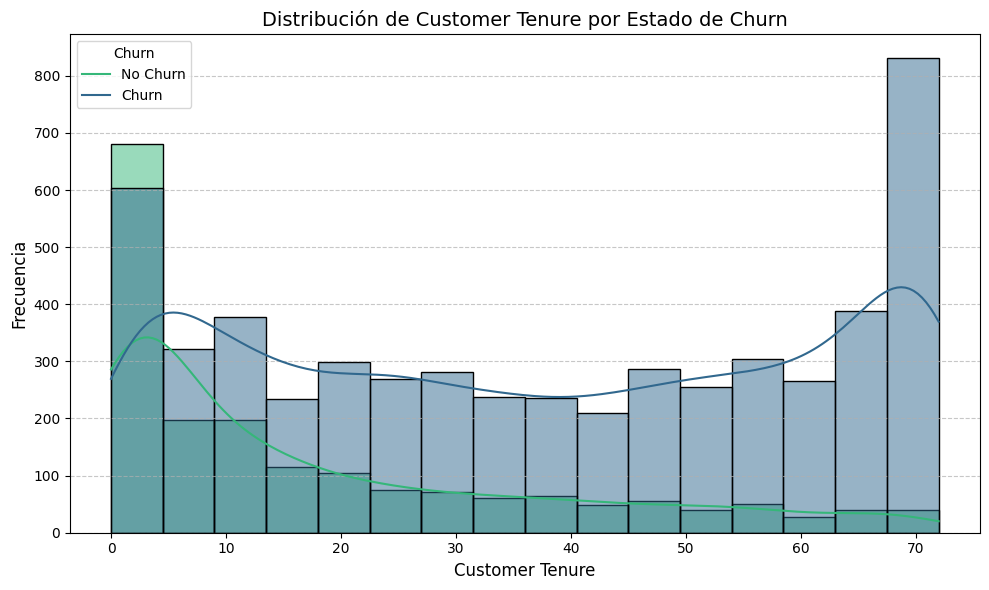

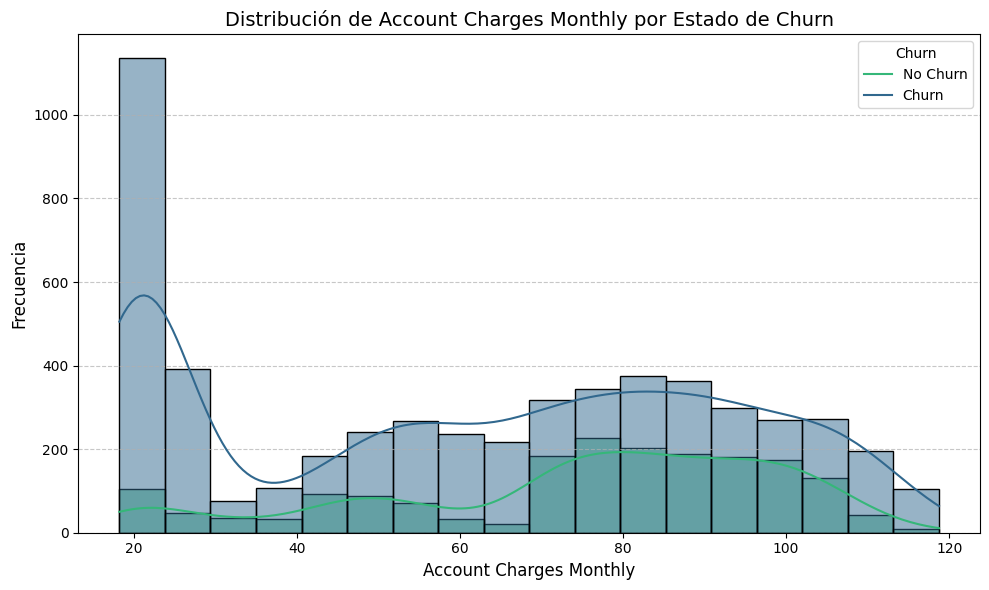

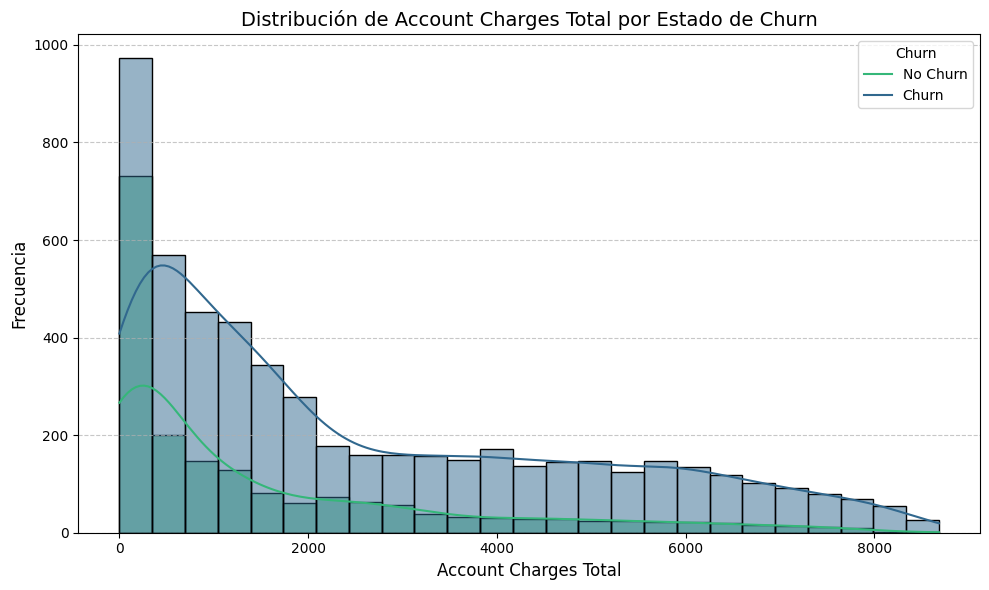

In [25]:
print('--- Visualización de distribuciones numéricas por estado de Churn ---')

# Definir las columnas numéricas de interés
columns_numericas_de_interes = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

# Iterar sobre cada columna numérica y crear un histograma con KDE
for col in columns_numericas_de_interes:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_normalizado, x=col, hue='Churn', kde=True, palette='viridis', common_norm=False)
    plt.title(f'Distribución de {col.replace('.', ' ').title()} por Estado de Churn', fontsize=14)
    plt.xlabel(col.replace('.', ' ').title(), fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Churn', labels=['No Churn', 'Churn'])
    plt.tight_layout()
    plt.show()

**Resumen**
Hallazgos clave del análisis de datos

*   **Customer Tenure:** Los clientes que han abandonado su cuenta presentan una antigüedad significativamente menor en comparación con los clientes que no la han abandonado. La antigüedad promedio de los clientes que han abandonado su cuenta es de aproximadamente 18 años (mediana: 10 años), mientras que para los clientes que no la han abandonado es de aproximadamente 37,3 años (mediana: 37 años). Esto sugiere que los clientes más nuevos son más propensos a abandonar su cuenta.
*   **Monthly Charges:** Los clientes que han abandonado su cuenta tienden a tener cargos mensuales más altos. El cargo mensual promedio para los clientes que han abandonado su cuenta es de aproximadamente \$74,4 (mediana: \$79,6), superior al promedio de los clientes que no la han abandonado, de aproximadamente \$61,4 (mediana: \$64,5).
*   **Total Charges:** A pesar de los cargos mensuales más altos, los clientes que han abandonado su cuenta tienen cargos totales más bajos en general. Los cargos totales promedio para los clientes que se dan de baja son de aproximadamente \$1531.8 (mediana \$703.5), significativamente menores que el promedio de \$2535.3 (mediana \$1663.6) de los clientes que no se dieron de baja. Este patrón es consistente con su menor permanencia.
*   **Confirmaciones visuales:** Los histogramas con Estimaciones de Densidad Kernel (KDE) confirman visualmente estas tendencias, mostrando cambios de distribución distintivos para cada característica numérica entre los grupos de clientes que se dieron de baja y los que no, lo que refuerza las diferencias estadísticas.


**Perspectivas o próximos pasos**
*   **Insight:** Una menor permanencia del cliente, combinada con cargos mensuales más altos, son indicadores sólidos de riesgo de abandono. Esto sugiere que los clientes que pagan más al mes y no llevan mucho tiempo con el servicio tienen mayor probabilidad de abandonarlo.
*   **Siguientes pasos:** Investigue los servicios o funciones específicos asociados con cargos mensuales más altos para comprender si ciertas ofertas o paquetes premium contribuyen más a la pérdida de clientes. Considere desarrollar estrategias de retención dirigidas específicamente a los clientes más nuevos con facturas mensuales más altas.

#📄Informe final

## 1. Introducción

El presente informe tiene como objetivo principal comprender y analizar los factores que contribuyen a la evasión de clientes, conocida como 'churn', en una empresa de telecomunicaciones. La retención de clientes es un pilar fundamental para el crecimiento sostenible y la rentabilidad de cualquier negocio, especialmente en sectores competitivos como el de las telecomunicaciones, donde adquirir nuevos clientes suele ser significativamente más costoso que mantener los existentes.

Este análisis busca identificar patrones, tendencias y las principales variables que influyen en la decisión de un cliente de abandonar el servicio. A través de la exploración de datos, la extracción de insights y la formulación de recomendaciones estratégicas, esperamos proporcionar una base sólida para que la empresa pueda implementar acciones efectivas destinadas a mitigar el churn y mejorar la lealtad de sus clientes.

## 2. Limpieza y Tratamiento de Datos

Durante esta fase, se llevaron a cabo los siguientes pasos clave para preparar el dataset para el análisis:

### Carga Inicial y Normalización de Datos
1.  **Carga del JSON**: Se utilizó la librería `requests` para obtener el archivo JSON directamente desde la URL `https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json`. Posteriormente, el contenido del archivo se decodificó a un objeto Python mediante `json.loads()`.
2.  **Normalización a DataFrame**: El diccionario JSON, que contenía estructuras anidadas, se normalizó a un DataFrame plano llamado `df_normalizado` utilizando `pd.json_normalize()`. Esto transformó las columnas anidadas como 'customer', 'phone', 'internet' y 'account' en columnas individuales con prefijos, facilitando su manejo.

### Gestión de Valores Ausentes y Duplicados
1.  **Verificación de Nulos y Duplicados**: Se realizó una verificación exhaustiva de valores ausentes utilizando `df_normalizado.isnull().sum()` y de filas duplicadas con `df_normalizado.duplicated().sum()`. Se confirmó que no había valores nulos explícitos ni filas completamente duplicadas en el DataFrame inicial.

### Corrección de Tipos de Datos
1.  **Columna `account.Charges.Total`**: Se identificó que la columna `account.Charges.Total` era de tipo `object` debido a la presencia de cadenas vacías (que no son nulos explícitos pero impiden la conversión numérica). Para corregir esto:
    *   Se utilizó `pd.to_numeric(errors='coerce')` para convertir la columna a numérica, transformando cualquier valor no numérico (incluidas las cadenas vacías) en `NaN`.
    *   Los valores `NaN` resultantes se rellenaron con `0.0`, asumiendo que un cargo total vacío implica que no hubo cargos.

### Análisis y Codificación de Variables Categóricas
1.  **Análisis de Inconsistencias Categóricas**: Se iteró sobre las columnas de tipo `object` (excluyendo 'customerID') para examinar sus valores únicos. Este análisis reveló una cadena vacía `''` en la columna `Churn`.
2.  **Corrección de la columna `Churn`**: La cadena vacía `''` en la columna `Churn` se reemplazó por la etiqueta 'No', asegurando la consistencia en los valores de esta variable binaria.
3.  **Codificación Binaria**: Se convirtieron varias columnas categóricas binarias (originalmente con valores 'Yes'/'No' o '0'/'1' en el caso de `SeniorCitizen`) a representaciones numéricas de `1` (para 'Yes' o '1') y `0` (para 'No' o '0'). Las columnas afectadas fueron `Churn`, `customer.Partner`, `customer.Dependents`, `phone.PhoneService` y `account.PaperlessBilling`. Se utilizó un mapeo `{'Yes': 1, 'No': 0}` y el método `.replace()` para esta transformación. La columna `customer.SeniorCitizen` ya estaba en formato 0/1.

Estos pasos de limpieza y tratamiento de datos aseguraron que el `df_normalizado` estuviera en un formato adecuado y consistente para las fases posteriores de análisis y modelado.

## 3. Análisis Exploratorio de Datos (AED) - Variables Categóricas

El análisis de las variables categóricas en relación con la variable `Churn` es crucial para identificar patrones y segmentos de clientes que son más propensos a abandonar el servicio. A través de la exploración de las distribuciones de frecuencia y las tasas de churn por categoría, podemos comprender mejor los factores que influyen en la retención de clientes.

### Distribución General de Churn

Como se observó, la distribución general de la variable `Churn` muestra que aproximadamente el **25.72%** de los clientes han abandonado el servicio, mientras que el **74.28%** ha permanecido. Esta tasa de churn significativa subraya la importancia de identificar los factores contribuyentes.

### Hallazgos Clave por Variables Categóricas

El análisis de la tasa de Churn por variables categóricas ha revelado los siguientes patrones:

*   **customer.SeniorCitizen**: Los **clientes SeniorCitizens (40.27%)** tienen una tasa de churn significativamente más alta que los no SeniorCitizens (22.89%). Esto sugiere que los clientes mayores pueden tener diferentes necesidades o una menor tolerancia a ciertos aspectos del servicio.

*   **customer.Partner y customer.Dependents**: Los clientes **sin pareja (Partners=0) y sin dependientes (Dependents=0)** muestran tasas de churn más altas (32.01% y 30.34% respectivamente) en comparación con aquellos que sí tienen pareja o dependientes. Esto podría indicar que los clientes con responsabilidades familiares tienen una mayor necesidad de estabilidad en sus servicios.

*   **internet.InternetService**: El servicio de internet de **Fibra Óptica tiene la tasa de churn más alta (40.56%)**, en contraste con DSL (18.45%) y la ausencia de servicio de internet (7.15%). Este hallazgo es crítico, ya que la Fibra Óptica es un servicio premium y una alta tasa de churn aquí podría indicar problemas con la calidad, fiabilidad o el precio percibido.

*   **Servicios de seguridad de internet (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport)**: La **falta de servicios de seguridad en línea** como OnlineSecurity, OnlineBackup, DeviceProtection y TechSupport está fuertemente asociada con tasas de churn considerablemente más altas (alrededor del 38-40%). Esto sugiere que los clientes valoran estos servicios de protección y soporte.

*   **account.Contract**: Los **contratos mes a mes (Month-to-month) tienen una tasa de churn drásticamente mayor (41.32%)** que los contratos a un año (10.93%) o dos años (2.75%). Esto es un claro indicador de que los contratos a largo plazo son un fuerte factor de retención.

*   **account.PaperlessBilling**: Los clientes con **facturación electrónica (PaperlessBilling=1) presentan una tasa de churn más alta (32.48%)** que aquellos con facturación en papel (15.87%). Esto podría apuntar a problemas de usabilidad o satisfacción con el sistema de facturación digital.

*   **account.PaymentMethod**: El método de pago **"Cheque Electrónico" (Electronic check) exhibe la tasa de churn más elevada (43.8%)**. Este es un hallazgo importante que podría indicar fricciones o insatisfacción con este método de pago en particular.

### Implicaciones y Recomendaciones Estratégicas

Estos hallazgos proporcionan información valiosa para comprender el comportamiento del cliente y diseñar estrategias de retención. Las áreas de intervención clave incluyen:

*   **Senior Citizens y Clientes Solteros/Sin Dependientes**: Desarrollar ofertas y soporte personalizados para estos segmentos, entendiendo sus necesidades específicas.
*   **Servicio de Fibra Óptica**: Investigar y mejorar la experiencia del cliente con el servicio de Fibra Óptica para reducir la alta tasa de churn, ya sea a través de mejoras en el servicio, precios o soporte.
*   **Servicios de Seguridad y Soporte**: Promocionar activamente y quizás incluir como parte estándar, los servicios de OnlineSecurity, OnlineBackup, DeviceProtection y TechSupport para aumentar la percepción de valor y reducir el churn.
*   **Contratos a Largo Plazo**: Incentivar fuertemente la transición de contratos mes a mes a contratos de uno o dos años mediante descuentos o beneficios adicionales.
*   **Facturación Electrónica y Cheque Electrónico**: Optimizar la experiencia de usuario con la facturación electrónica y revisar el proceso o las implicaciones del método de "Cheque Electrónico" para identificar y resolver puntos de fricción.

## 4. Análisis Exploratorio de Datos (AED) - Variables Numéricas

El análisis de las variables numéricas es fundamental para entender cómo ciertos atributos cuantitativos de los clientes se relacionan con el churn. Al comparar las estadísticas descriptivas y las distribuciones de variables como la antigüedad del cliente (`customer.tenure`), los cargos mensuales (`account.Charges.Monthly`) y los cargos totales (`account.Charges.Total`) entre clientes que han churned y los que no, podemos identificar patrones y características que predisponen a un cliente a abandonar el servicio.

### customer.tenure (Antigüedad del Cliente)

Los datos muestran una diferencia notable en la antigüedad promedio entre ambos grupos:

*   **Clientes que no churned (Churn = 0):** Antigüedad media de 37.32 meses (mediana: 37.0 meses).
*   **Clientes que churned (Churn = 1):** Antigüedad media de 17.98 meses (mediana: 10.0 meses).

Como se observa en los histogramas, la distribución para los clientes que churned está fuertemente sesgada hacia tenencias más cortas, lo que indica que los clientes con menos tiempo en el servicio son significativamente más propensos a abandonarlo. Esto resalta la importancia de las estrategias de retención temprana.

### account.Charges.Monthly (Cargos Mensuales)

En cuanto a los cargos mensuales, también se aprecian diferencias significativas:

*   **Clientes que no churned (Churn = 0):** Cargos mensuales promedio de \$61.35 (mediana: \$64.50).

*   **Clientes que churned (Churn = 1):** Cargos mensuales promedio de \$74.44 (mediana: \$79.65).

Las visualizaciones confirman que los clientes que churned tienden a tener cargos mensuales más altos. Esto podría sugerir que la insatisfacción con el costo del servicio o la percepción de valor puede ser un factor en la decisión de irse, especialmente si perciben que están pagando mucho por un servicio que no satisface sus expectativas.

### account.Charges.Total (Cargos Totales)

Paradójicamente, a pesar de tener cargos mensuales más altos, los clientes que churned tienen cargos totales promedio más bajos:

*   **Clientes que no churned (Churn = 0):** Cargos totales promedio de \$2535.26 (mediana: \$1663.63).
*   **Clientes que churned (Churn = 1):** Cargos totales promedio de \$1531.80 (mediana: \$703.55).

Esta aparente contradicción se explica por la menor antigüedad (`customer.tenure`) de los clientes que abandonan. Aunque pagan más mensualmente, el tiempo que permanecen como clientes es mucho menor, resultando en un total acumulado más bajo. Los histogramas ilustran claramente estas distribuciones, mostrando que los cargos totales de los clientes que abandonan se concentran en valores más bajos.

### Conclusiones de las Variables Numéricas

En resumen, los clientes con mayor riesgo de churn son aquellos con una antigüedad más corta y que, a menudo, enfrentan cargos mensuales más elevados. Aunque sus cargos totales son menores debido a su breve permanencia, esta combinación de factores (poca antigüedad y alto costo percibido) los convierte en un segmento crítico para las estrategias de retención. Estos hallazgos sugieren la necesidad de un monitoreo especial para los nuevos clientes con facturas altas, y la implementación de programas que mejoren la percepción de valor y fomenten la lealtad a largo plazo.

## 5. Conclusiones e Insights Clave

El análisis de churn ha revelado varios factores críticos que influyen en la decisión de los clientes de abandonar el servicio. Comprender estos factores es fundamental para desarrollar estrategias de retención efectivas y mejorar la experiencia general del cliente.

### Hallazgos Clave:

*   **Demografía y Contexto del Cliente:**
    *   **Senior Citizens:** Los clientes de la tercera edad (`customer.SeniorCitizen` = 1) presentan una tasa de churn significativamente más alta (40.27%) en comparación con los clientes más jóvenes (22.89%). Esto sugiere que este segmento puede tener necesidades o expectativas no satisfechas, o que encuentran más difícil adaptarse a los servicios digitales.
    *   **Clientes sin Pareja ni Dependientes:** Los clientes que no tienen pareja (`customer.Partner` = 0) y/o no tienen dependientes (`customer.Dependents` = 0) muestran tasas de churn más elevadas (32.01% y 30.34% respectivamente). Esto podría indicar que los clientes con menos ataduras familiares tienen menos incentivos para permanecer con un proveedor de servicios si encuentran una alternativa mejor.

*   **Factores Relacionados con el Servicio:**
    *   **Servicio de Internet de Fibra Óptica:** A pesar de ser una tecnología avanzada, el servicio de fibra óptica (`internet.InternetService` = 'Fiber optic') tiene la tasa de churn más alta (40.56%). Esto es notablemente superior al DSL (18.45%) y a la ausencia de servicio de internet (7.15%). Este hallazgo sugiere posibles problemas con la calidad del servicio, la estabilidad de la conexión, o el soporte asociado a la fibra óptica, o incluso una falta de diferenciación percibida en el precio/valor.
    *   **Servicios de Seguridad y Soporte:** La ausencia de servicios de valor añadido como `OnlineSecurity`, `OnlineBackup`, `DeviceProtection` y `TechSupport` está fuertemente correlacionada con tasas de churn elevadas (alrededor del 38-40% para cada categoría 'No'). Esto subraya la importancia crítica de la seguridad y el soporte técnico en la retención de clientes.

*   **Preferencias de Contrato y Facturación:**
    *   **Contratos Mes a Mes:** Los clientes con contratos mes a mes (`account.Contract` = 'Month-to-month') tienen una tasa de churn drásticamente mayor (41.32%) en comparación con los contratos de uno (10.93%) o dos años (2.75%). Esto indica que los contratos a largo plazo son un fuerte factor de retención, mientras que la flexibilidad de los contratos mensuales facilita el cambio de proveedor.
    *   **Facturación Electrónica:** Los clientes que optan por la facturación electrónica (`account.PaperlessBilling` = 1) presentan una tasa de churn más alta (32.48%) que aquellos con facturación en papel (15.87%). Esto podría ser un indicio de que los procesos de facturación digital no son lo suficientemente claros o convenientes para todos los usuarios.
    *   **Método de Pago "Cheque Electrónico":** Este método de pago (`account.PaymentMethod` = 'Electronic check') se asocia con la tasa de churn más alta (43.8%). Es crucial investigar si existen problemas de usabilidad o seguridad percibidos con este método que inciden directamente en la satisfacción del cliente.

*   **Tendencias Numéricas:**
    *   **Antigüedad del Cliente (Tenure):** Los clientes que hacen churn tienen una antigüedad significativamente menor (promedio de 18.0 meses, mediana de 10.0 meses) en comparación con los que no hacen churn (promedio de 37.3 meses, mediana de 37.0 meses). Esto resalta que los clientes nuevos o con poca antigüedad son más propensos a irse.
    *   **Cargos Mensuales y Totales:** Los clientes que hacen churn tienden a tener cargos mensuales más altos (promedio de \$74.4) que los que no hacen churn (promedio de \$61.4). Sin embargo, debido a su menor antigüedad, sus cargos totales son considerablemente más bajos (promedio de \$1531.8) en comparación con los clientes retenidos (promedio de \$2535.3). Este patrón sugiere que los clientes con facturas mensuales más elevadas pero con un historial de servicio corto son un segmento de alto riesgo.

### Implicaciones para el Comportamiento del Cliente:
Estos insights sugieren que el churn no es un evento aleatorio, sino que está impulsado por una combinación de factores demográficos, la calidad percibida de los servicios, la estructura del contrato y la experiencia de facturación. Los clientes valoran la seguridad, el soporte y la estabilidad, y son más propensos a irse si no se sienten satisfechos o si encuentran barreras en su experiencia, especialmente los clientes nuevos con altos costos mensuales.


## 6. Recomendaciones Estratégicas

Basado en el análisis de la tasa de churn por características categóricas y numéricas, se proponen las siguientes recomendaciones estratégicas para reducir la rotación de clientes y mejorar la retención:

### Segmentos de Clientes en Riesgo y Acciones Específicas:

1.  **Clientes Senior Citizens:**
    *   **Insight:** Tasa de churn significativamente más alta (40.27%) que los no Senior Citizens (22.89%).
    *   **Recomendación:** Desarrollar campañas de marketing y ofertas de servicio personalizadas para clientes de la tercera edad, enfocándose en la facilidad de uso, soporte técnico accesible y planes que se ajusten a sus necesidades específicas (ej. descuentos en servicios esenciales, paquetes con menos características complejas).

2.  **Clientes sin Pareja y sin Dependientes:**
    *   **Insight:** Muestran tasas de churn más altas (32.01% y 30.34% respectivamente).
    *   **Recomendación:** Crear programas de fidelización o paquetes de servicios que añadan valor a clientes individuales, como beneficios por lealtad, acceso a contenido exclusivo o descuentos en servicios adicionales que puedan ser atractivos para este demográfico.

3.  **Clientes con Contratos Mes a Mes:**
    *   **Insight:** La tasa de churn es drásticamente mayor (41.32%) en comparación con contratos a un año (10.93%) o dos años (2.75%).
    *   **Recomendación:** Ofrecer incentivos atractivos para la migración a contratos de mayor duración (ej. descuentos significativos en la factura mensual, mejoras de servicio gratuitas, dispositivos a precios reducidos al firmar un contrato anual/bianual). Destacar el ahorro a largo plazo y la estabilidad del servicio.

### Servicios y Características Problemáticas y Acciones Correctivas:

1.  **Servicio de Internet de Fibra Óptica:**
    *   **Insight:** La tasa de churn más alta (40.56%).
    *   **Recomendación:** Investigar a fondo las causas de insatisfacción con el servicio de fibra óptica (ej. velocidad inconsistente, interrupciones, problemas de instalación o soporte técnico). Implementar mejoras operativas, asegurar la estabilidad del servicio y comunicar proactivamente las mejoras a los clientes de fibra óptica. Considerar la implementación de un "equipo de rescate" especializado para clientes de fibra óptica que expresen insatisfacción.

2.  **Falta de Servicios de Seguridad en Línea, Copia de Seguridad, Protección de Dispositivos y Soporte Técnico:**
    *   **Insight:** Asociada con tasas de churn considerablemente más altas (alrededor del 38-40%).
    *   **Recomendación:** Promocionar activamente la importancia y los beneficios de estos servicios adicionales. Considerar ofrecer períodos de prueba gratuitos, paquetes integrados con descuentos o incluso incluir servicios básicos de seguridad y soporte en planes de internet de gama media/alta para reducir la percepción de riesgo y aumentar el valor percibido.

3.  **Facturación Electrónica (Paperless Billing) y Método de Pago "Cheque Electrónico":**
    *   **Insight:** Tasas de churn más altas (32.48% para facturación electrónica y 43.8% para cheque electrónico).
    *   **Recomendación:** Realizar encuestas de satisfacción y análisis de la experiencia del usuario para identificar fricciones o problemas con estos métodos. Optimizar la interfaz de facturación electrónica para que sea más intuitiva y fácil de gestionar. Para el cheque electrónico, evaluar si existen alternativas de pago más seguras y convenientes para el cliente, o mejorar el proceso actual para reducir errores y demoras.

### Acciones Transversales:

*   **Monitoreo Activo:** Implementar un sistema de alerta temprana para identificar a los clientes con alta probabilidad de churn basado en los indicadores clave (ej. baja antigüedad, altos cargos mensuales, tipo de contrato, uso de servicios de fibra óptica). Cuando se detecte un cliente en riesgo, iniciar un contacto proactivo con ofertas de retención personalizadas o encuestas de satisfacción.
*   **Capacitación del Personal:** Asegurar que el personal de atención al cliente y soporte técnico esté bien capacitado para manejar las preocupaciones de los clientes, especialmente aquellos en segmentos de alto riesgo o con problemas de servicio de fibra óptica.
*   **Comunicación de Valor:** Resaltar continuamente el valor y los beneficios de los servicios de la compañía, no solo al inicio, sino a lo largo de la vida del cliente, para justificar los cargos y fomentar la lealtad.